<a href="https://colab.research.google.com/github/Grenki-with-cheese/2213935-CN5004-exercises/blob/main/Week_2_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: b0=0.0425, b1=0.1275, Cost = 10.8750
Iteration 100: b0=0.4454, b1=1.5483, Cost = 0.0541
Iteration 200: b0=0.3835, b1=1.5696, Cost = 0.0498
Iteration 300: b0=0.3301, b1=1.5877, Cost = 0.0466
Iteration 400: b0=0.2842, b1=1.6033, Cost = 0.0443
Iteration 500: b0=0.2447, b1=1.6168, Cost = 0.0425
Iteration 600: b0=0.2106, b1=1.6284, Cost = 0.0412
Iteration 700: b0=0.1813, b1=1.6383, Cost = 0.0403
Iteration 800: b0=0.1561, b1=1.6469, Cost = 0.0395
Iteration 900: b0=0.1344, b1=1.6543, Cost = 0.0390

Final coefficients: b0=0.1159, b1=1.6606


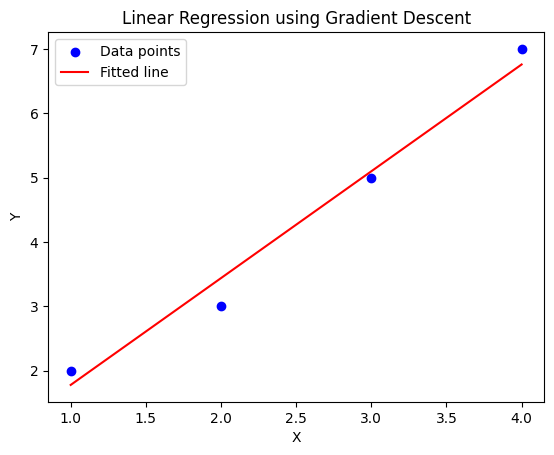

In [ ]:
#Gradient Descent Problem
#just testing commit for github

import numpy as np
import matplotlib.pyplot as plt

# sample data (x and y)
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 5, 7])

# Initialise parameters
b0 = 0  # Intercept
b1 = 0  # Slope
learning_rate = 0.01  #step size
iterations = 1000 #number of iterations

# Number of samples
n = len(x)

# Gradient Descent function
def gradient_descent(x, y, b0, b1, learning_rate, iterations):
  for i in range(iterations):
    # Predicted Y values (b0+b1*x) using Linear Regression
    y_pred = b0 + b1*x

    # Compute gradients
    db0 = (1/n) * sum(y_pred - y)     #Partial derivative wrt b0
    db1 = (1/n) * sum((y_pred - y)*x) #partial derivative wrt b1

    # Update b0 and b1
    b0 -= learning_rate * db0
    b1 -= learning_rate * db1

    # Print values after every 100 iterations for insight
    if i%100==0:
      cost = (1/(2*n))*sum((y_pred - y)**2)
      print(f"Iteration {i}: b0={b0:.4f}, b1={b1:.4f}, Cost = {cost:.4f}")

  return b0, b1

# Run Gradient Descent
b0, b1 = gradient_descent(x, y, b0, b1, learning_rate, iterations)

print(f"\nFinal coefficients: b0={b0:.4f}, b1={b1:.4f}")

# Plotting the result
plt.scatter(x, y, color="blue", label="Data points")
plt. plot(x, b0 + b1*x, color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

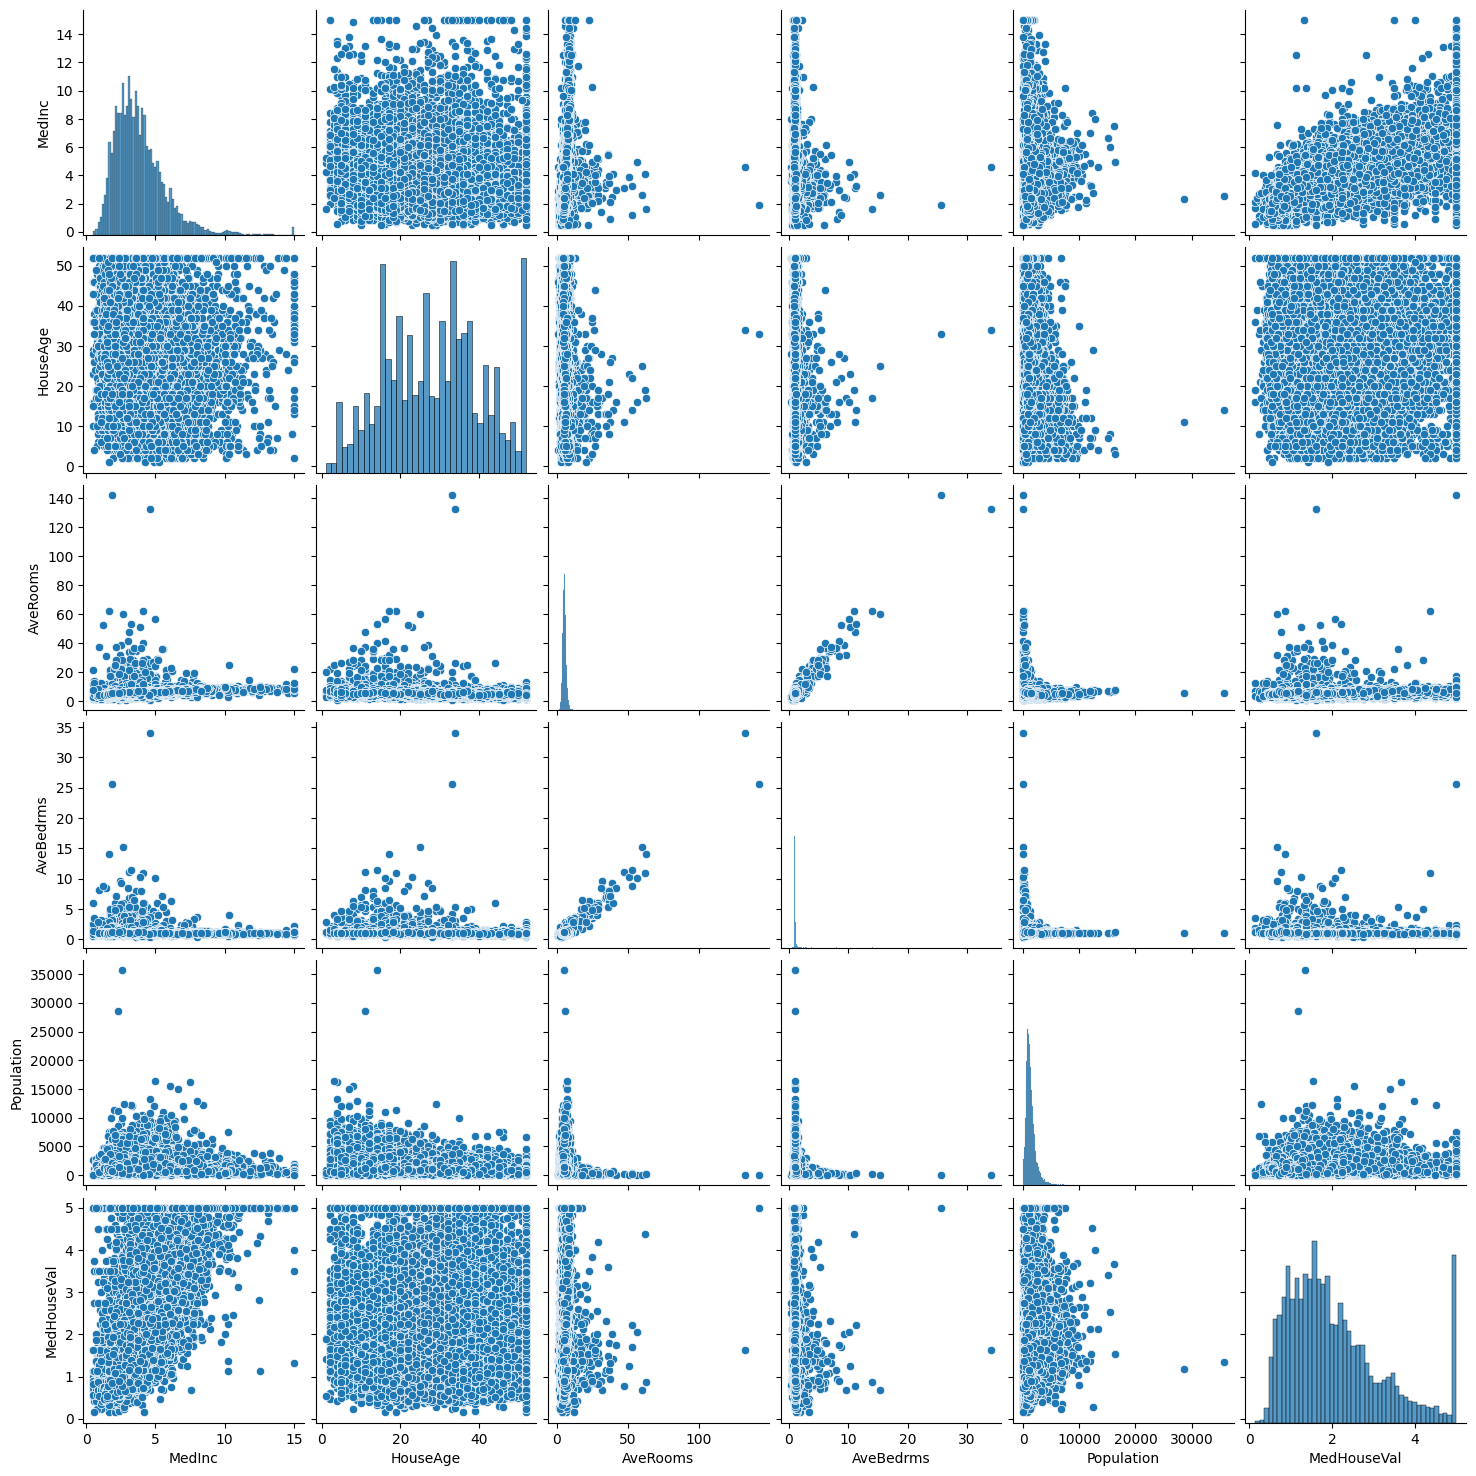

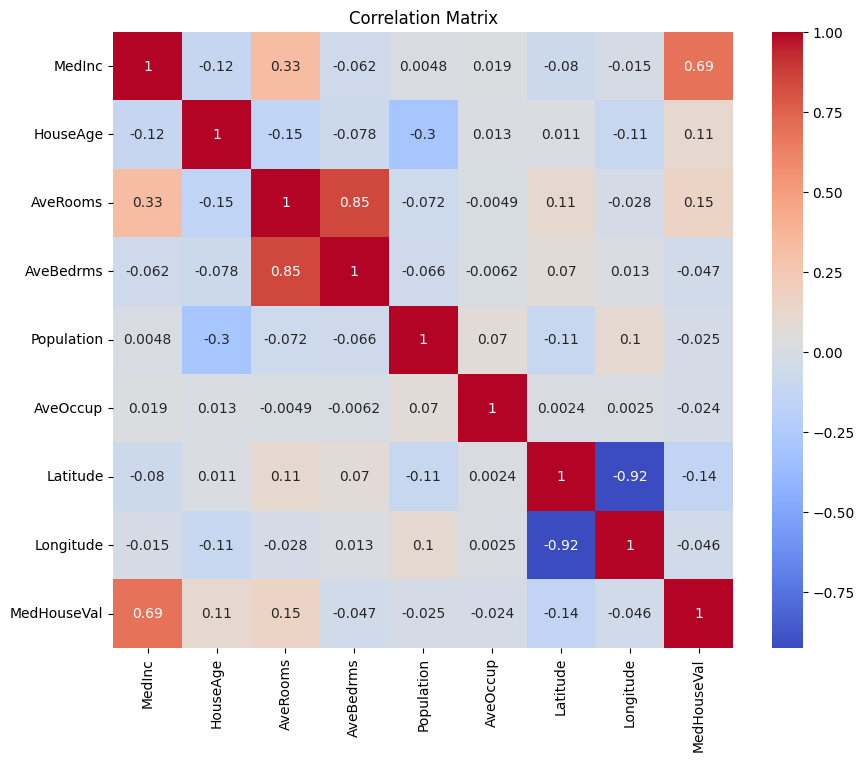

Training set size: (16512, 8)
Testing set size: (4128, 8)


In [ ]:
#-------------STEP 1 Importing libraries and modules----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for data loading and splitting
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#--------------STEP 2 loading the dataset-----------

# for scaling features
from sklearn.preprocessing import StandardScaler

# loading the dataset
california = fetch_california_housing()

#create a dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# display first five rows
print(data.head(10))
data.count()

#--------------STEP 3 Data exploration and preprocessing

# Check for missing values
print(data.isnull().sum())

# Statistical summary
print(data.describe())

# Visualising feature relationships
# Pairplot for selected features
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'MedHouseVal']])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#--------------STEP 4 - Splitting the dataset ------------------
# Features and target variable
x = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Splitting the dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

In [ ]:
#--------------STEP 4 - Splitting the dataset ------------------
# Features and target variable
x = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Splitting the dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (16512, 8)
Testing set size: (4128, 8)


In [ ]:
#-------------STEP 5 Training the Linear Regression Model----------
# Initialise the linear regression model
lr_model=LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Coefficients
print("Intercept (b0):", round(lr_model.intercept_,3))
print("coefficients (b1, b2, ..., b8):",np.round (lr_model.coef_,4))

Intercept (b0): -37.023
coefficients (b1, b2, ..., b8): [ 0.4487  0.0097 -0.1233  0.7831 -0.     -0.0035 -0.4198 -0.4337]


In [ ]:
#---------------STEP 6 Evaluating the Model-------------------------
#Mean Squared Error (MSE): Average of squares of errors
#Root Mean Squared Error (RMSE): Square root of MSE so MSE^2
#Mean Absolute Error (MAE): Average of absolute errors
#R-squared (R^2): Proportion of variance explained by the model

# Predictions on the test set
y_pred = lr_model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== scikit-learn Linear Regression Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

=== scikit-learn Linear Regression Evaluation ===
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R^2): 0.5758


In [ ]:
# Dummy data for prediction (same feature structure as x)
dummy_data = pd.DataFrame({
    'MedInc': [5.0, 8.0, 3.0],
    'HouseAge': [30,10,40],
    'AveRooms': [6.0, 5.0, 4.0],
    'AveBedrms': [1.0, 1.5, 1.0],
    'Population': [1000, 500, 2000],
    'AveOccup': [3.0, 2.5, 4.0],
    'Latitude': [34.0, 36.0, 38.0],
    'Longitude': [-120.0, -121.0, -122.0]
})

# Predictions
dummy_predictions = lr_model.predict(dummy_data)
print("===Predictions on dummy data using scikit-learn linear regression===")
for i, pred in enumerate(dummy_predictions, 1):
  print(f"Dummy Data {i}: Predicted MedHouseVal = {pred:.4f}")

===Predictions on dummy data using scikit-learn linear regression===
Dummy Data 1: Predicted MedHouseVal = 3.3144
Dummy Data 2: Predicted MedHouseVal = 4.5778
Dummy Data 3: Predicted MedHouseVal = 1.9437


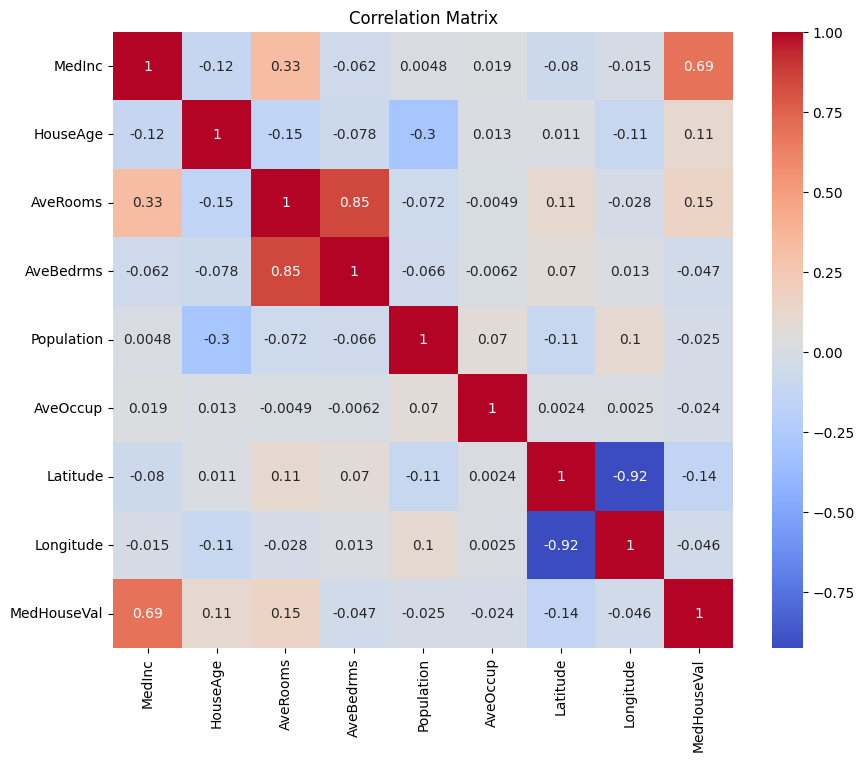

In [ ]:
#Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#For this step the features whose absolute correlation with MedHouseVal
#is greater than> or equal to= 0.15
#Refer to the heatmap above
#MedHouseVal correlation with MedInc and AveRooms is equal or above 0.15
#It is a moderate rule, and if we want we can make it looser (0.05) or stricter (0.5)

#we are choosing the target variable
#We target MedHouseVal to then find features with strong enough correlation
corr_target = abs(corr_matrix['MedHouseVal'])

#selecting features with correlation >=0.15
high_corr_features = corr_target[corr_target >= 0.15].index.tolist()

#Remove the target variable from the list
high_corr_features.remove('MedHouseVal')

print("Features with high correlation (|correlation| >= 0.15) with MedHouseVal:")
print(high_corr_features)

Features with high correlation (|correlation| >= 0.15) with MedHouseVal:
['MedInc', 'AveRooms']


In [ ]:
# Define the feature matrix X and target vector y using high correlation features
# Our high correlation features are MedInc and AveRooms, both corr >=0.15 yeah
x = data[high_corr_features]
y = data['MedHouseVal']

# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (16512, 2)
Testing set size: (4128, 2)


In [ ]:
# initialise the linear regression model
lr_model = LinearRegression()

# model training
lr_model.fit(x_train, y_train)

# Display the model's intercept and coefficients
print(f"Intercept (b0): {lr_model.intercept_}")
print(f"Coefficients (b1, b2, b3): {lr_model.coef_}")

Intercept (b0): 0.5972677793933272
Coefficients (b1, b2, b3): [ 0.43626089 -0.04017161]


In [ ]:
# Predict on the test set
y_pred = lr_model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 0.7022
Root Mean Squared Error (RMSE): 0.8379
Mean Absolute Error (MAE): 0.6247
R-squared (R²): 0.4642
